# Курсовой проект

**Подключение библиотек**

In [141]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error

import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ModuleNotFoundError: No module named 'catboost'

In [55]:
def evaluate_preds(true_values_train, pred_values_train, true_values_test, pred_values_test):
    print('Train:\t' + 'R2 = ' + str(round(r2_score(true_values_train, pred_values_train), 3)) + 
          '\tMAE = ' + str(int(mean_absolute_error(true_values_train, pred_values_train))) +
          '\n' +
          'Test:\t' + 'R2 = ' + str(round(r2_score(true_values_test, pred_values_test), 3)) +
          '\tMAE = ' + str(int(mean_absolute_error(true_values_test, pred_values_test)))
         )
    
    plt.figure(figsize=(16, 6))
       
    plt.subplot(121)
    sns.scatterplot(x=pred_values_train, y=true_values_train)
    plt.plot([0, 500000], [0, 500000], linestyle='--', color='black')
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train: True vs Predicted values');
    
    plt.subplot(122)
    sns.scatterplot(x=pred_values_test, y=true_values_test)
    plt.plot([0, 500000], [0, 500000], linestyle='--', color='black')
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test: True vs Predicted values');

**Пути к директориям и файлам**

In [56]:
TRAIN_DATASET_PATH = 'train.csv'
TEST_DATASET_PATH = 'test.csv'
PREDICT_DATASET_PATH = 'predict.csv'

In [57]:
import warnings
warnings.filterwarnings('ignore')
matplotlib.rcParams.update({'font.size': 14})
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Загрузка данных

**Описание датасета**

* **Id** - идентификационный номер квартиры
* **DistrictId** - идентификационный номер района
* **Rooms** - количество комнат
* **Square** - площадь
* **LifeSquare** - жилая площадь
* **KitchenSquare** - площадь кухни
* **Floor** - этаж
* **HouseFloor** - количество этажей в доме
* **HouseYear** - год постройки дома
* **Ecology_1, Ecology_2, Ecology_3** - экологические показатели местности
* **Social_1, Social_2, Social_3** - социальные показатели местности
* **Healthcare_1, Helthcare_2** - показатели местности, связанные с охраной здоровья
* **Shops_1, Shops_2** - показатели, связанные с наличием магазинов, торговых центров
* **Price** - цена квартиры

In [58]:
df_train = pd.read_csv(TRAIN_DATASET_PATH, index_col='Id')
df_test = pd.read_csv(TEST_DATASET_PATH, index_col='Id')
df_train.head(10)

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
14038,35,2.000,47.982,29.443,6.000,7,9.000,1969,0.089,B,B,33,7976,5,nan,0,11,B,184966.931
15053,41,3.000,65.684,40.050,8.000,7,9.000,1978,0.000,B,B,46,10309,1,240.000,1,16,B,300009.450
4765,53,2.000,44.948,29.198,0.000,8,12.000,1968,0.050,B,B,34,7759,0,229.000,1,3,B,220925.909
5809,58,2.000,53.353,52.732,9.000,8,17.000,1977,0.438,B,B,23,5735,3,1084.000,0,5,B,175616.227
10783,99,1.000,39.649,23.776,7.000,11,12.000,1976,0.012,B,B,35,5776,1,2078.000,2,4,B,150226.532
12915,59,3.000,80.384,46.684,12.000,5,17.000,2011,0.309,B,B,35,7715,4,990.000,0,6,B,215898.448
14549,154,2.000,62.254,37.160,7.000,3,5.000,1960,0.461,B,B,20,4386,14,nan,1,5,B,296021.204
11993,74,2.000,80.313,nan,0.000,14,0.000,1977,0.076,B,B,6,1437,3,nan,0,2,B,221244.157
5172,1,2.000,64.511,nan,1.000,9,17.000,1977,0.007,B,B,1,264,0,nan,0,1,B,229102.796


In [59]:
df_train.shape

(10000, 19)

In [60]:
df_train.columns

Index(['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor',
       'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2', 'Ecology_3',
       'Social_1', 'Social_2', 'Social_3', 'Healthcare_1', 'Helthcare_2',
       'Shops_1', 'Shops_2', 'Price'],
      dtype='object')

In [61]:
df_train.dtypes

DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

In [62]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
DistrictId,10000.000,50.401,43.588,0.000,20.000,36.000,75.000,209.000
Rooms,10000.000,1.891,0.840,0.000,1.000,2.000,2.000,19.000
Square,10000.000,56.316,21.059,1.137,41.775,52.513,65.901,641.065
LifeSquare,7887.000,37.200,86.241,0.371,22.770,32.781,45.129,7480.592
KitchenSquare,10000.000,6.273,28.561,0.000,1.000,6.000,9.000,2014.000
Floor,10000.000,8.527,5.241,1.000,4.000,7.000,12.000,42.000
HouseFloor,10000.000,12.609,6.776,0.000,9.000,13.000,17.000,117.000
HouseYear,10000.000,3990.166,200500.261,1910.000,1974.000,1977.000,2001.000,20052011.000
Ecology_1,10000.000,0.119,0.119,0.000,0.018,0.075,0.196,0.522
Social_1,10000.000,24.687,17.533,0.000,6.000,25.000,36.000,74.000


In [63]:
df_train.describe(include='object').T

,count,unique,top,freq
Ecology_2,10000,2,B,9903
Ecology_3,10000,2,B,9725
Shops_2,10000,2,B,9175


Пропущена почти половина значений в параметре Healthcare_1 и пятая часть в LifeSquare
Остальные данные есть полностью
Недостающие значения Healthcare_1 можно попробовать заполнить медианой района, в котором находится квартира
Между Square и LifeSquare должна быть зависимость. Возможно, на основе этой зависимости можно будет получить недостающие значения

Возможно кваритры с классом А - более дорогие, также они могут находится в одних районах
В Ecology_2 есть небольшой количество класса A, возможно правильнее будет заменить эти значения на B, чтобы не сбивать модель

У некоторых квартир маленькая или вообще нет кухни. Может быть на основе наличия кухни можно построить категориальную переменную. Либо следать кластеризацию по этому признаку

Квартир с общей площадью более 200 метров совсем немного и все кроме одной они все довольно странные по количеству комнат
Возможно, было бы правильнее посчитать им количество комнат по средней площади одной комнаты

Есть примерно 10 квартир с 0 комнат

Есть 1 квартира с очень маленькой площадью. Возможно, проще всего ее просто дропнуть

Признаки Ecology_2, Ecology_3, Shops_2 представленый практически исключительно одним значеним. Возможно, их вообще не стоит использовать в модели
Более менее разнообразный признак только Shops_2

У 1500 домов этаж квартиры больше количества этажей в доме. На данный момент решил, что этаж квартиры указан верно. Отталкиваясь от этажа квартиры и медианного соотношения этажа квартиры и высоты здания рассчитал высоту зданий

## Заполнение пропусков в данных

In [64]:
df_train.loc[df_train['Healthcare_1'].isna(), 'Healthcare_1'] =\
df_train.groupby(['DistrictId'])['Healthcare_1'].transform(lambda x: x.median())

df_train.loc[df_train['Healthcare_1'].isna(), 'Healthcare_1'] =\
df_train.groupby(['Helthcare_2'])['Healthcare_1'].transform(lambda x: x.median())

In [65]:
df_test.loc[df_test['Healthcare_1'].isna(), 'Healthcare_1'] =\
df_test.groupby(['DistrictId'])['Healthcare_1'].transform(lambda x: x.median())

df_test.loc[df_test['Healthcare_1'].isna(), 'Healthcare_1'] =\
df_test.groupby(['Helthcare_2'])['Healthcare_1'].transform(lambda x: x.median())

Заполняем пропущенные значения Healthcare_1 медианой по районам. Оставшиеся пропущенные значения заполняем медианой по группам Helthcare_2

In [66]:
df_train.loc[df_train['LifeSquare'].isna(), 'LifeSquare'] =\
df_train.groupby(np.round(df_train['Square']))['LifeSquare'].transform(lambda x: x.median())

df_train.loc[df_train['LifeSquare'].isna(), 'LifeSquare'] = df_train.loc[df_train['LifeSquare'].isna()]['Square'] /\
pd.Series(df_train['Square'] / df_train['LifeSquare']).median()

In [67]:
df_test.loc[df_test['LifeSquare'].isna(), 'LifeSquare'] =\
df_test.groupby(np.round(df_test['Square']))['LifeSquare'].transform(lambda x: x.median())

df_test.loc[df_test['LifeSquare'].isna(), 'LifeSquare'] = df_test.loc[df_test['LifeSquare'].isna()]['Square'] /\
pd.Series(df_test['Square'] / df_test['LifeSquare']).median()

Заполняем пропущенные значения в параметре LifeSquare
В первом проходе заполняем пропущенные значения медианой квартир с примерно такой же общей площадью

## Обработка выбросов

In [68]:
df_train.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000
mean,50.401,1.891,56.316,37.356,6.273,8.527,12.609,3990.166,0.119,24.687,5352.157,8.039,986.173,1.319,4.231,214138.857
std,43.588,0.840,21.059,76.944,28.561,5.241,6.776,200500.261,0.119,17.533,4006.800,23.832,929.389,1.494,4.806,92872.294
min,0.000,0.000,1.137,0.371,0.000,1.000,0.000,1910.000,0.000,0.000,168.000,0.000,0.000,0.000,0.000,59174.778
25%,20.000,1.000,41.775,23.113,1.000,4.000,9.000,1974.000,0.018,6.000,1564.000,0.000,240.000,0.000,1.000,153872.634
50%,36.000,2.000,52.513,33.273,6.000,7.000,13.000,1977.000,0.075,25.000,5285.000,2.000,750.000,1.000,3.000,192269.645
75%,75.000,2.000,65.901,45.149,9.000,12.000,17.000,2001.000,0.196,36.000,7227.000,5.000,1322.000,2.000,6.000,249135.462
max,209.000,19.000,641.065,7480.592,2014.000,42.000,117.000,20052011.000,0.522,74.000,19083.000,141.000,4849.000,6.000,23.000,633233.467


Выбросы возможно есть в:
* количестве комнат
* общей площади
* почти навернаяка есть в жилой площади, потому что максимум в жилой площади больше максимума в общей площади
* почти наверняка в площади кухни, потому что сложно представить кухню площадью 2000

**Убираем выбросы в количестве комнат**

In [69]:
df_train.loc[df_train['Rooms'] > 9]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
5927,57,10.000,59.057,36.223,10.000,22,22.000,2002,0.091,B,B,74,19083,2,1406.000,5,15,B,317265.324
8491,1,19.000,42.006,21.779,7.000,17,17.000,2014,0.007,B,B,1,264,0,240.000,0,1,B,78364.617
14865,9,10.000,60.871,38.421,10.000,3,2.000,1994,0.162,B,B,25,5648,1,30.000,2,4,B,172329.271


In [70]:
median_room_square = pd.Series(df_train['Square'] / df_train['Rooms']).median()
df_train.loc[df_train['Rooms'] > 9, ['Rooms']] = np.round(df_train.loc[df_train['Rooms'] > 9]['Square']  / median_room_square)

Есть всего 3 квартиры с количеством комнат больше 9. Они все относительно маленькие и вряд ли в них столько комнат
Чтобы получить более близкое к реальности количество комнат разделим общую площадь квартир на медианную площадь одной комнаты

In [71]:
df_train.loc[df_train['Rooms'] == 0, ['Rooms']] = np.round(df_train.loc[df_train['Rooms'] == 0]['Square']  / median_room_square)
df_train.loc[df_train.index == 3224, ['Rooms']] = 1

Также есть несколько квартир с 0 комнат. Рассчитаем для них количество комнат по медианной площади

In [72]:
df_train.loc[df_train['Rooms'] == 7, ['Rooms']] = 5
df_train.loc[df_train['Rooms'] == 6, ['Rooms']] = 3

In [73]:
median_room_square = pd.Series(df_test['Square'] / df_test['Rooms']).median()
df_test.loc[df_test['Rooms'] > 5, ['Rooms']] = np.round(df_test.loc[df_test['Rooms'] > 5]['Square']  / median_room_square)

df_test.loc[df_test['Rooms'] == 0, ['Rooms']] = np.round(df_test.loc[df_test['Rooms'] == 0]['Square']  / median_room_square)

df_test.loc[df_test.index == 4058, ['Rooms']] = 5

**Обработка общей площади**

In [74]:
df_train.loc[df_train['Square'] > 200]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
7917,27,5.000,212.932,211.231,0.000,2,3.000,2008,0.211,B,B,9,1892,0,540.000,0,1,B,302211.261
5548,86,5.000,275.645,233.949,26.000,12,37.000,2011,0.162,B,A,31,7010,5,4508.000,3,7,B,455264.883
28,9,2.000,604.706,376.054,1.000,17,18.000,1977,0.162,B,B,25,5648,1,30.000,2,4,B,187717.243
2307,102,1.000,409.425,410.640,10.000,4,4.000,2016,0.239,B,B,26,3889,6,705.000,3,6,B,90470.431
11602,30,2.000,641.065,638.163,10.000,20,19.000,2019,0.000,B,B,22,6398,141,1046.000,3,23,B,133529.682
16568,27,4.000,200.335,201.627,25.000,1,2.000,2013,0.041,B,B,53,14892,4,1015.000,1,4,B,528560.506


Пока оставим эти квартиры как есть

**Обработка жилой площади**

In [75]:
df_train.loc[df_train['LifeSquare'] > df_train['Square']]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
8054,23,1.000,42.530,43.968,1.000,3,9.000,2014,0.035,B,B,0,168,0,0.000,0,0,B,95338.199
10521,38,3.000,104.211,106.340,0.000,20,0.000,2017,0.061,B,B,15,2787,2,520.000,0,7,B,435462.048
2301,1,2.000,61.400,65.225,0.000,17,22.000,2016,0.007,B,B,1,264,0,240.000,0,1,B,199215.452
8753,25,3.000,85.952,89.804,1.000,4,3.000,2017,0.070,B,B,53,13670,4,1015.000,1,11,B,309688.593
9870,62,1.000,51.831,53.491,1.000,5,1.000,2015,0.072,B,B,2,629,1,2300.000,0,0,A,131797.472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41,30,2.000,59.016,59.439,12.000,5,5.000,2016,0.000,B,B,22,6398,141,1046.000,3,23,B,126281.143
12918,23,2.000,51.440,53.134,51.000,3,17.000,2017,0.006,B,B,1,388,0,0.000,0,0,B,88150.013
2737,27,3.000,123.430,125.807,123.000,5,10.000,2015,0.018,B,B,2,469,0,540.000,0,0,B,234194.837


In [76]:
df_train.loc[df_train['LifeSquare'] > df_train['Square'], ['LifeSquare']] =\
df_train.loc[df_train['LifeSquare'] > df_train['Square']]['Square'] *\
pd.Series(df_train['LifeSquare'] / df_train['Square']).median()

In [77]:
df_test.loc[df_test['LifeSquare'] > df_test['Square'], ['LifeSquare']] =\
df_test.loc[df_test['LifeSquare'] > df_test['Square']]['Square'] *\
pd.Series(df_test['LifeSquare'] / df_test['Square']).median()

В 486 квартир жилая площадь больше общей площади квартиры
Для корректировки данных расчитаем медианной соотношение жилой площади к общей площади и скорректируем значение жилой площади на основе этой информации

In [78]:
df_train.loc[df_train['LifeSquare'] / df_train['Square'] < 0.2]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
4378,27,3.000,106.959,0.642,0.000,17,0.000,2018,0.072,B,B,2,629,1,540.000,0,0,A,337299.868
4280,34,2.000,61.335,4.092,1.000,26,1.000,2014,0.070,B,B,53,13670,4,1015.000,1,11,B,286564.442
12613,6,2.000,65.497,5.589,1.000,5,17.000,1977,0.243,B,B,5,1564,0,540.000,0,0,B,180727.644
16779,27,3.000,51.991,4.896,1.000,22,25.000,1977,0.072,B,B,2,629,1,540.000,0,0,A,174687.566
3522,6,1.000,66.420,3.987,1.000,2,1.000,1977,0.243,B,B,5,1564,0,540.000,0,0,B,193361.230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13583,27,2.000,58.943,3.319,1.000,11,17.000,2017,0.012,B,B,4,915,0,540.000,0,0,B,142789.949
2040,62,1.000,122.438,5.751,1.000,2,3.000,1977,0.072,B,B,2,629,1,2300.000,0,0,A,224900.898
13630,24,3.000,127.141,4.811,1.000,3,1.000,2017,0.112,B,B,50,12238,8,1970.000,2,3,B,611250.912


In [79]:
df_train.loc[df_train['LifeSquare'] / df_train['Square'] < 0.2, ['LifeSquare']] =\
df_train.loc[df_train['LifeSquare'] / df_train['Square'] < 0.2]['Square'] *\
pd.Series(df_train['LifeSquare'] / df_train['Square']).median()

In [80]:
df_test.loc[df_test['LifeSquare'] / df_test['Square'] < 0.2, ['LifeSquare']] =\
df_test.loc[df_test['LifeSquare'] / df_test['Square'] < 0.2]['Square'] *\
pd.Series(df_test['LifeSquare'] / df_test['Square']).median()

Почти у 200 квартир жилай площадь очень мала по сравнению с общей площадью
Правим эти данные

**Обработка площади кухни**

In [81]:
df_train.loc[df_train['KitchenSquare'] > df_train['LifeSquare']]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
16395,2,3.000,79.722,44.731,72.000,12,16.000,1987,0.131,B,B,39,10418,9,900.000,1,9,B,370148.625
1315,6,1.000,48.128,45.024,48.000,21,1.000,2013,0.243,B,B,5,1564,0,540.000,0,0,B,146950.912
14656,62,1.000,47.101,46.448,2014.000,4,1.000,2014,0.072,B,B,2,629,1,2300.000,0,0,A,108337.484
2371,27,2.000,68.841,64.235,66.000,4,2.000,2014,0.018,B,B,2,469,0,540.000,0,0,B,189244.250
4265,161,2.000,53.217,32.645,53.000,7,17.000,1994,0.001,B,B,14,3369,24,4129.000,0,3,B,261125.670
15691,62,1.000,41.735,12.423,14.000,3,15.000,2010,0.072,B,B,2,629,1,2300.000,0,0,A,80331.108
12390,72,3.000,97.491,60.627,96.000,22,25.000,2019,0.210,B,B,11,2398,2,1994.000,3,0,B,445074.957
16781,27,1.000,36.138,22.474,36.000,19,19.000,2017,0.072,B,B,2,629,1,540.000,0,0,A,131742.536
6508,23,2.000,67.146,33.959,63.000,5,17.000,2019,0.035,B,B,0,168,0,0.000,0,0,B,193130.586


In [82]:
df_train.loc[df_train['KitchenSquare'] > df_train['LifeSquare'], ['KitchenSquare']] =\
df_train.loc[df_train['KitchenSquare'] > df_train['LifeSquare']]['LifeSquare'] *\
pd.Series(df_train['KitchenSquare'] / df_train['LifeSquare']).median()

In [83]:
df_test.loc[df_test['KitchenSquare'] > df_test['LifeSquare'], ['KitchenSquare']] =\
df_test.loc[df_test['KitchenSquare'] > df_test['LifeSquare']]['LifeSquare'] *\
pd.Series(df_test['KitchenSquare'] / df_test['LifeSquare']).median()

У ряда квартир площадь кухни больше жилой площади
Меняем площадь кухни на иснове медианного соотношения площади кухни и жилой площади

**Обработка количества этажей в здании**

In [84]:
df_train.loc[df_train['HouseFloor'] == 0]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
11993,74,2.000,80.313,48.078,0.000,14,0.000,1977,0.076,B,B,6,1437,3,750.000,0,2,B,221244.157
6641,54,3.000,118.908,69.029,0.000,2,0.000,1977,0.006,B,B,30,5285,0,645.000,6,6,B,571069.053
4378,27,3.000,106.959,66.516,0.000,17,0.000,2018,0.072,B,B,2,629,1,540.000,0,0,A,337299.868
9371,23,2.000,60.503,39.358,0.000,16,0.000,1977,0.035,B,B,0,168,0,0.000,0,0,B,229778.058
10521,38,3.000,104.211,64.807,0.000,20,0.000,2017,0.061,B,B,15,2787,2,520.000,0,7,B,435462.048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12302,30,1.000,46.073,28.652,0.000,4,0.000,1977,0.000,B,B,22,6398,141,1046.000,3,23,B,161403.094
9384,59,3.000,98.607,64.834,0.000,14,0.000,1977,0.020,B,B,37,7687,11,176.000,5,5,B,492700.257
11441,62,2.000,71.985,44.766,0.000,5,0.000,1977,0.072,B,B,2,629,1,2300.000,0,0,A,158841.625


In [85]:
df_train.loc[df_train['HouseFloor'] == 0, ['HouseFloor']] =\
np.round(df_train.loc[df_train['HouseFloor'] == 0,]['Floor'] /\
pd.Series(df_train['Floor'] / df_train['HouseFloor']).median())

In [86]:
df_test.loc[df_test['HouseFloor'] == 0, ['HouseFloor']] =\
np.round(df_test.loc[df_test['HouseFloor'] == 0,]['Floor'] /\
pd.Series(df_test['Floor'] / df_test['HouseFloor']).median())

На основе медианного соотношения этажа квартиры и общего количества этажей правим количество этажей у довом с 0 этажей

In [87]:
df_train.loc[df_train['Floor'] > df_train['HouseFloor']]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
10953,27,1.000,53.769,52.408,1.000,5,4.000,1977,0.072,B,B,2,629,1,540.000,0,0,A,140647.566
2119,27,2.000,49.361,31.994,5.000,6,5.000,1983,0.052,B,B,5,1227,0,540.000,0,0,B,117000.381
11935,27,2.000,64.712,43.052,1.000,15,1.000,1977,0.211,B,B,9,1892,0,540.000,0,1,B,127200.027
6486,200,3.000,85.280,58.448,9.000,6,5.000,1960,0.000,B,B,33,7425,1,750.000,2,5,B,402871.916
10103,94,1.000,35.281,23.354,6.000,11,9.000,1971,0.283,B,B,33,8667,2,540.000,0,6,B,148862.210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2237,52,3.000,64.075,47.633,6.000,11,9.000,1983,0.371,B,B,34,7065,1,750.000,2,5,B,226434.880
16159,27,1.000,38.968,22.074,1.000,10,1.000,1977,0.211,B,B,9,1892,0,540.000,0,1,B,95529.569
4145,96,3.000,90.055,47.860,11.000,26,24.000,2005,0.041,B,B,53,14892,4,1015.000,1,4,B,441108.911


In [88]:
df_train.loc[df_train['Floor'] > df_train['HouseFloor'], ['HouseFloor']] =\
np.round(df_train.loc[df_train['Floor'] > df_train['HouseFloor']]['Floor'] /\
pd.Series(df_train['Floor'] / df_train['HouseFloor']).median())

In [89]:
df_test.loc[df_test['Floor'] > df_test['HouseFloor'], ['HouseFloor']] =\
np.round(df_test.loc[df_test['Floor'] > df_test['HouseFloor']]['Floor'] /\
pd.Series(df_test['Floor'] / df_test['HouseFloor']).median())

**Обработка года сдачи дома**

In [90]:
df_train.loc[df_train['HouseYear'] > 2020]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
10814,109,1.000,37.265,20.240,9.000,9,12.000,20052011,0.136,B,B,30,6141,10,262.000,3,6,B,254084.534
11607,147,2.000,44.792,28.360,5.000,4,9.000,4968,0.320,B,B,25,4756,16,2857.000,5,8,B,243028.603


In [91]:
df_train.loc[df_train.index == 10814, ['HouseYear']] = 2011
df_train.loc[df_train.index == 11607, ['HouseYear']] = 1968

Два дома имеют некорректный год сдачи
В строке 10814 возможно указан период постройки дома - поэтому заменим значение на конец период
В строке 11607 возможно опечатка в первом числе - вместо единыци указали 4

## Построение новых признаков

In [92]:
df_train.describe(include='object').T

,count,unique,top,freq
Ecology_2,10000,2,B,9903
Ecology_3,10000,2,B,9725
Shops_2,10000,2,B,9175


В наборе данных 3 категориальных признака. Ecology 2 и 3 практически полностью представлены одним значением. Поэтому не будем использовать их в модели
Shops_2 попробуем пока оставим

In [93]:
shops_2_train = pd.get_dummies(df_train['Shops_2'])
shops_2_test = pd.get_dummies(df_test['Shops_2'])
shops_2

,A,B
Id,,
725,0,1
15856,0,1
5480,0,1
15664,0,1
14275,1,0
...,...,...
8180,0,1
4695,0,1
5783,0,1


In [94]:
df_train[['Shops_2_A', 'Shops_2_B']] = shops_2_train[['A', 'B']]
df_train.drop('Shops_2', axis=1, inplace=True)
df_train.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,Shops_2_A,Shops_2_B
Id,,,,,,,,,,,,,,,,,,,,
14038,35,2.000,47.982,29.443,6.000,7,9.000,1969,0.089,B,B,33,7976,5,540.000,0,11,184966.931,0,1
15053,41,3.000,65.684,40.050,8.000,7,9.000,1978,0.000,B,B,46,10309,1,240.000,1,16,300009.450,0,1
4765,53,2.000,44.948,29.198,0.000,8,12.000,1968,0.050,B,B,34,7759,0,229.000,1,3,220925.909,0,1
5809,58,2.000,53.353,52.732,9.000,8,17.000,1977,0.438,B,B,23,5735,3,1084.000,0,5,175616.227,0,1
10783,99,1.000,39.649,23.776,7.000,11,12.000,1976,0.012,B,B,35,5776,1,2078.000,2,4,150226.532,0,1


In [95]:
df_test[['Shops_2_A', 'Shops_2_B']] = shops_2_test[['A', 'B']]
df_test.drop('Shops_2', axis=1, inplace=True)

<AxesSubplot:>

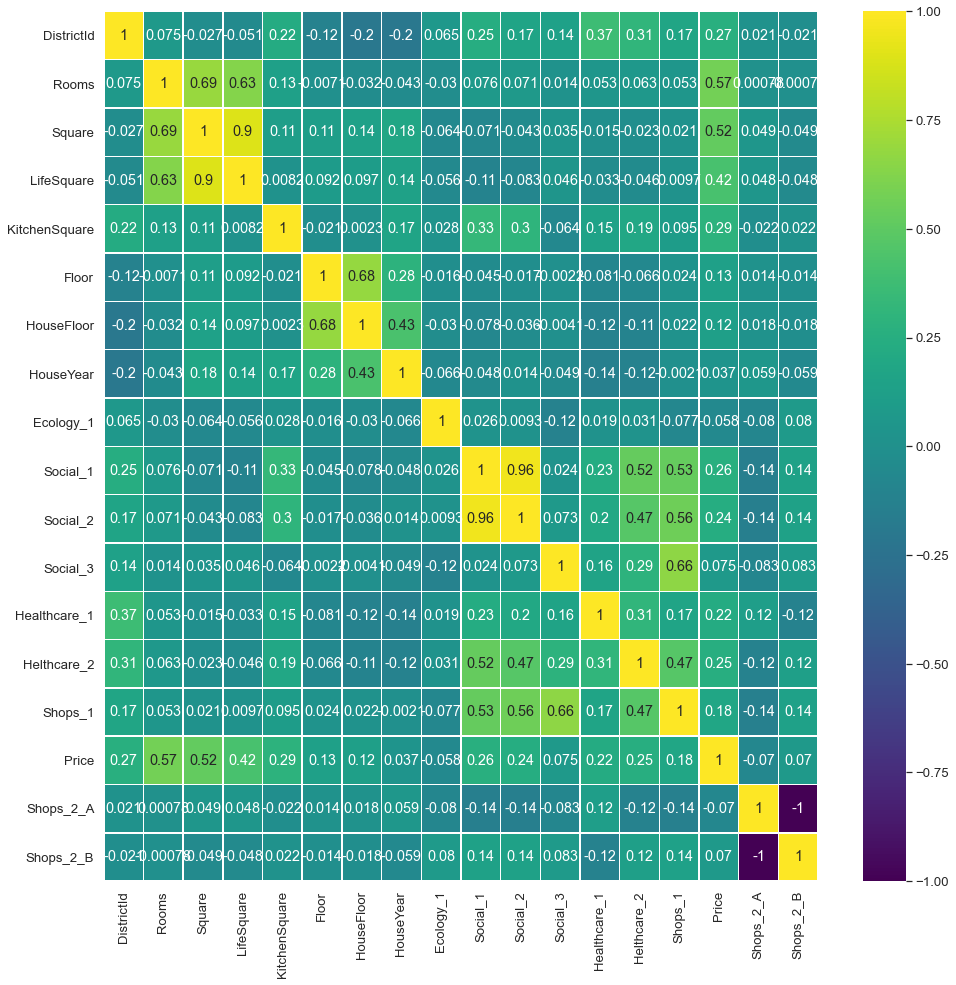

In [96]:
plt.figure(figsize = (16, 16))

sns.set(font_scale=1.2)
sns.heatmap(df_train.corr(), annot=True, linewidths=.5, cmap='viridis')

In [97]:
df_train.corr()['Price'].sort_values()

Shops_2_A       -0.070
Ecology_1       -0.058
HouseYear        0.037
Shops_2_B        0.070
Social_3         0.075
HouseFloor       0.120
Floor            0.129
Shops_1          0.181
Healthcare_1     0.220
Social_2         0.239
Helthcare_2      0.253
Social_1         0.263
DistrictId       0.265
KitchenSquare    0.285
LifeSquare       0.420
Square           0.520
Rooms            0.572
Price            1.000
Name: Price, dtype: float64

**Какие признаки можно добавить:**
* Соотношение жилой площади к общей. В теории чем выше соотношение - тем возможно больше стоит квартира
* Средняя площадь комнат в квартире
* Соотношение этажа квартиры к общему числу этажей - в теории чем выше квартирка в доме - тем она дороже
* Возраст дома

In [98]:
df_train['LifeSquare_to_Square_ratio'] = df_train['LifeSquare'] / df_train['Square']
df_train['RoomSquare'] = df_train['LifeSquare'] / df_train['Rooms']
df_train['Floor_to_HouseFloor_ratio'] = df_train['Floor'] / df_train['HouseFloor']

df_train[['LifeSquare_to_Square_ratio', 'RoomSquare', 'Floor_to_HouseFloor_ratio']].describe()

,LifeSquare_to_Square_ratio,RoomSquare,Floor_to_HouseFloor_ratio
count,10000.000,10000.000,10000.000
mean,0.634,20.458,0.605
std,0.116,8.621,0.246
min,0.202,0.707,0.050
25%,0.570,15.908,0.412
50%,0.622,18.751,0.667
75%,0.661,22.453,0.778
max,1.000,319.082,1.000


In [99]:
df_test['LifeSquare_to_Square_ratio'] = df_test['LifeSquare'] / df_test['Square']
df_test['RoomSquare'] = df_test['LifeSquare'] / df_test['Rooms']
df_test['Floor_to_HouseFloor_ratio'] = df_test['Floor'] / df_test['HouseFloor']

In [100]:
df_train.corr()['Price'].sort_values()

RoomSquare                   -0.143
Shops_2_A                    -0.070
Ecology_1                    -0.058
LifeSquare_to_Square_ratio    0.017
HouseYear                     0.037
Floor_to_HouseFloor_ratio     0.047
Shops_2_B                     0.070
Social_3                      0.075
HouseFloor                    0.120
Floor                         0.129
Shops_1                       0.181
Healthcare_1                  0.220
Social_2                      0.239
Helthcare_2                   0.253
Social_1                      0.263
DistrictId                    0.265
KitchenSquare                 0.285
LifeSquare                    0.420
Square                        0.520
Rooms                         0.572
Price                         1.000
Name: Price, dtype: float64

## Визуализация и анализ данных

**Анализ целевой переменной**

Text(0.5, 0.98, 'Распределение цены')

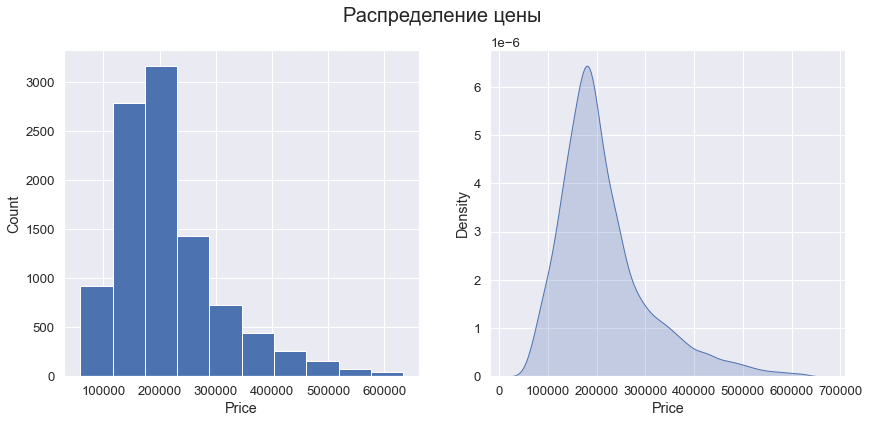

In [101]:
plt.figure(figsize = (14, 6))
plt.subplot(121)
df_train['Price'].hist(edgecolor='white')
plt.ylabel('Count')
plt.xlabel('Price')

plt.subplot(122)
sns.kdeplot(df_train['Price'], shade=True, legend=False)
plt.xlabel('Price')

plt.suptitle('Распределение цены', size=20)

Text(0.5, 1.0, 'Распределение цены')

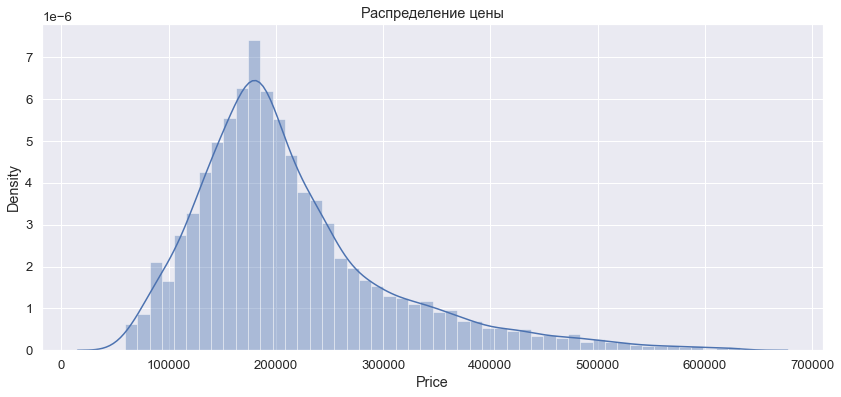

In [102]:
plt.figure(figsize = (14, 6))
sns.distplot(df_train['Price'])
plt.title('Распределение цены')

Целевая переменная распределяется несимметрично, есть правый хвост.
Распределение соответствует большинству финансовых показателей - в начале объектов много, затем размазывается

In [103]:
target_mean = round(df_train['Price'].mean(), 2)
target_median = df_train['Price'].median()

target_mean, target_median

(214138.86, 192269.64487934904)

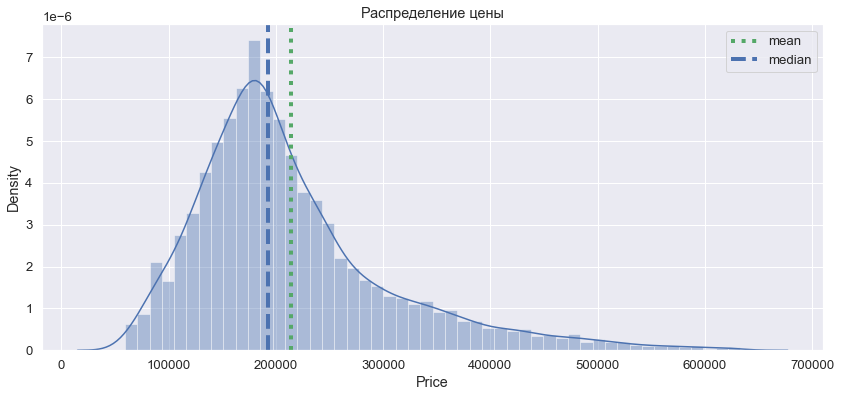

In [104]:
plt.figure(figsize = (14, 6))
sns.distplot(df_train['Price'])
plt.title('Распределение цены')
plt.axvline(target_mean, color='g', label='mean', linestyle=':', linewidth=4)
plt.axvline(target_median, color='b', label='median', linestyle='--', linewidth=4)
plt.legend();

Среднее заметно правее медианы - то есть в выборке есть относительно небольшое количество квартир с высокой стоимостью

## Анализ признаков

**Количественные признаки**

In [105]:
feature_num_names = df_train.drop('Price', axis=1).select_dtypes(include=['float64', 'int64']).columns.tolist()
feature_num_names

['DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'LifeSquare_to_Square_ratio',
 'RoomSquare',
 'Floor_to_HouseFloor_ratio']

array([[<AxesSubplot:title={'center':'DistrictId'}>,
        <AxesSubplot:title={'center':'Rooms'}>,
        <AxesSubplot:title={'center':'Square'}>,
        <AxesSubplot:title={'center':'LifeSquare'}>],
       [<AxesSubplot:title={'center':'KitchenSquare'}>,
        <AxesSubplot:title={'center':'Floor'}>,
        <AxesSubplot:title={'center':'HouseFloor'}>,
        <AxesSubplot:title={'center':'HouseYear'}>],
       [<AxesSubplot:title={'center':'Ecology_1'}>,
        <AxesSubplot:title={'center':'Social_1'}>,
        <AxesSubplot:title={'center':'Social_2'}>,
        <AxesSubplot:title={'center':'Social_3'}>],
       [<AxesSubplot:title={'center':'Healthcare_1'}>,
        <AxesSubplot:title={'center':'Helthcare_2'}>,
        <AxesSubplot:title={'center':'Shops_1'}>,
        <AxesSubplot:title={'center':'LifeSquare_to_Square_ratio'}>],
       [<AxesSubplot:title={'center':'RoomSquare'}>,
        <AxesSubplot:title={'center':'Floor_to_HouseFloor_ratio'}>,
        <AxesSubplot:>, <AxesS

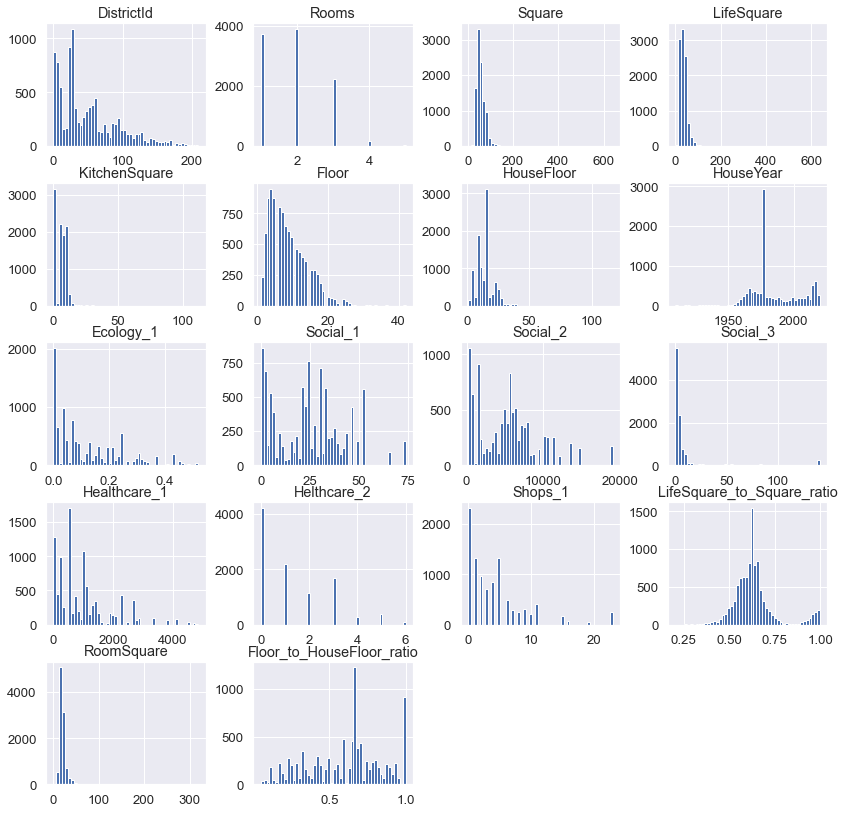

In [106]:
df_train[feature_num_names].hist(figsize=(14,14), bins=50, grid=True)

**Взаимосвязи между количественными признаками**

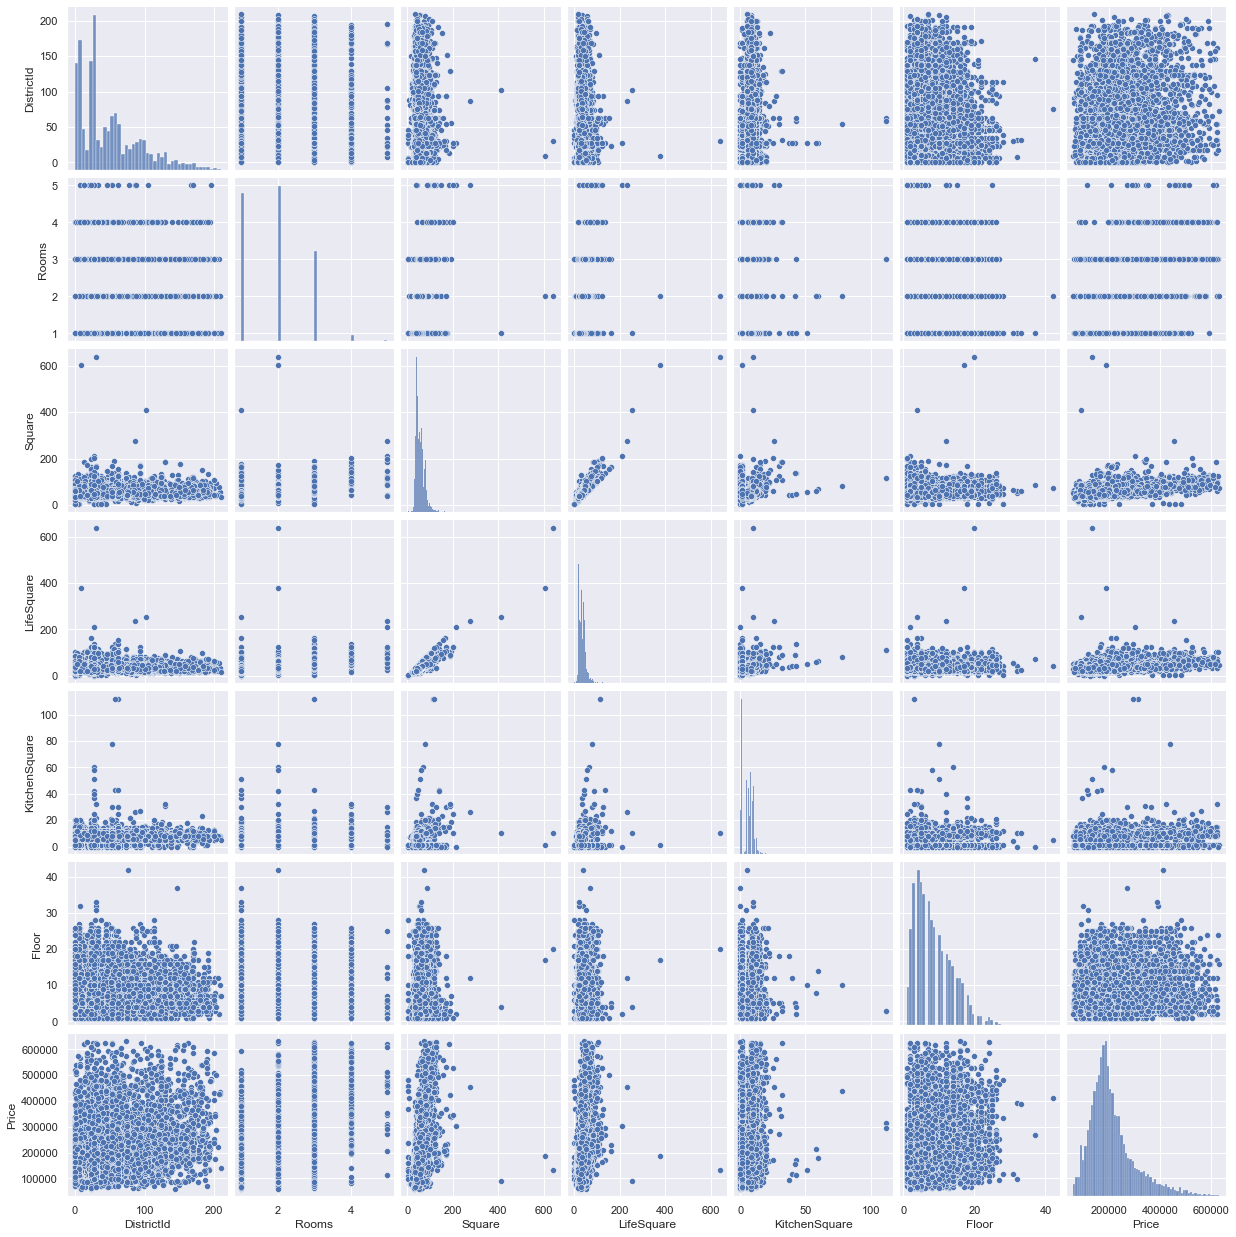

In [107]:
sns.set()
sns.pairplot(df_train[feature_num_names[:6] + ['Price']])

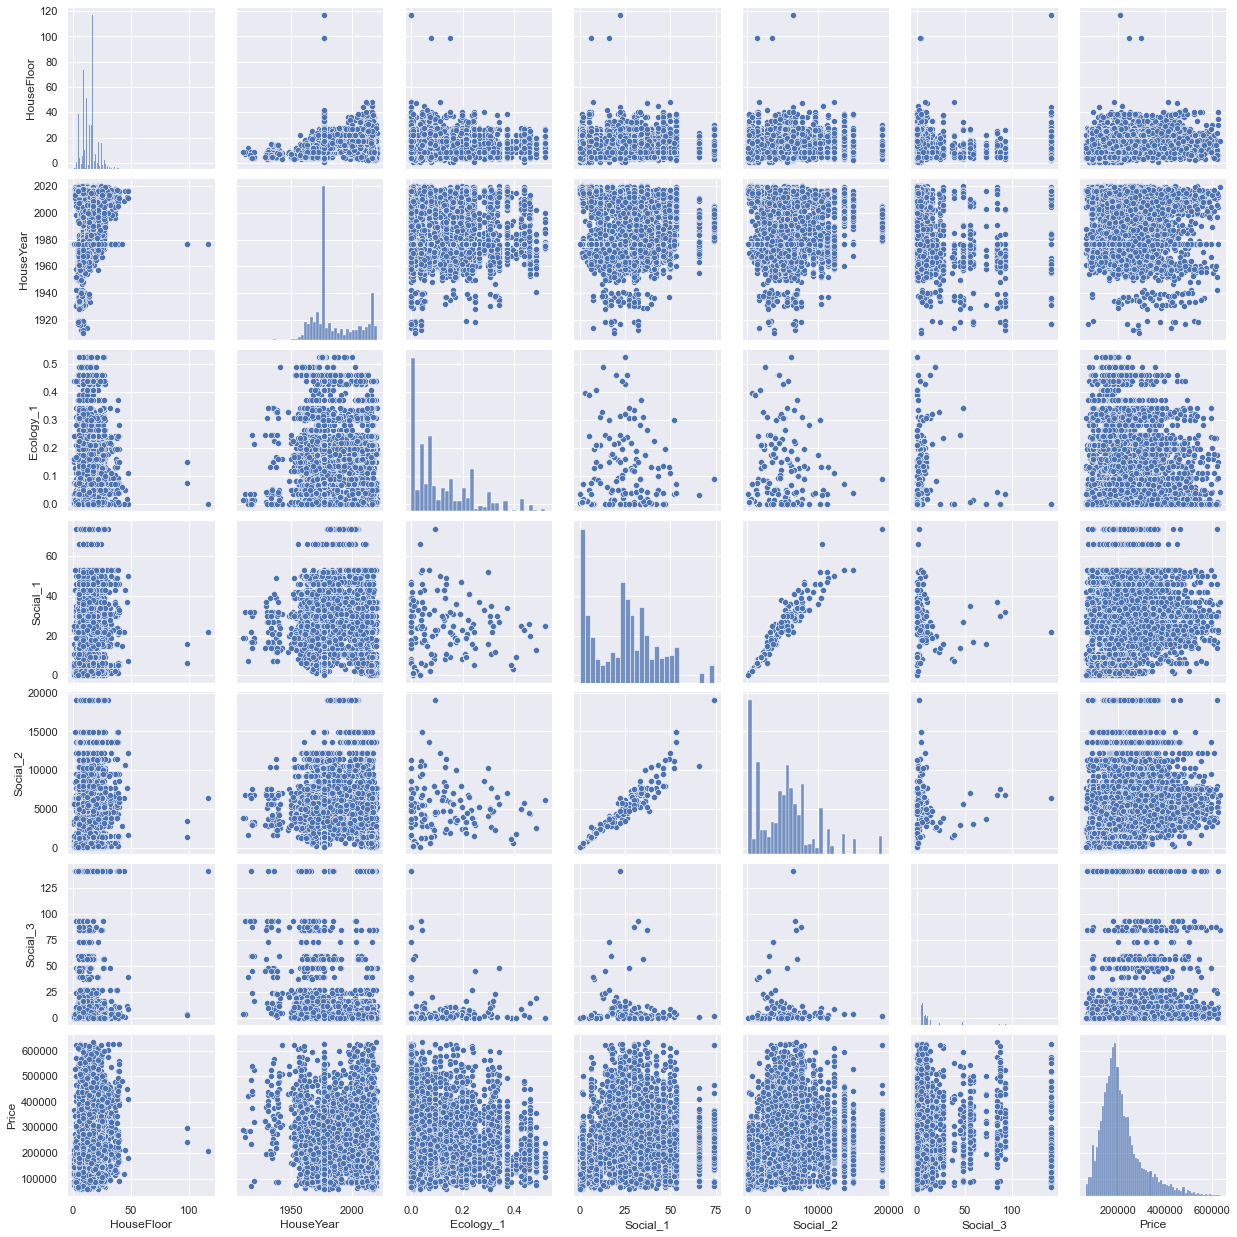

In [108]:
sns.set()
sns.pairplot(df_train[feature_num_names[6:12] + ['Price']])

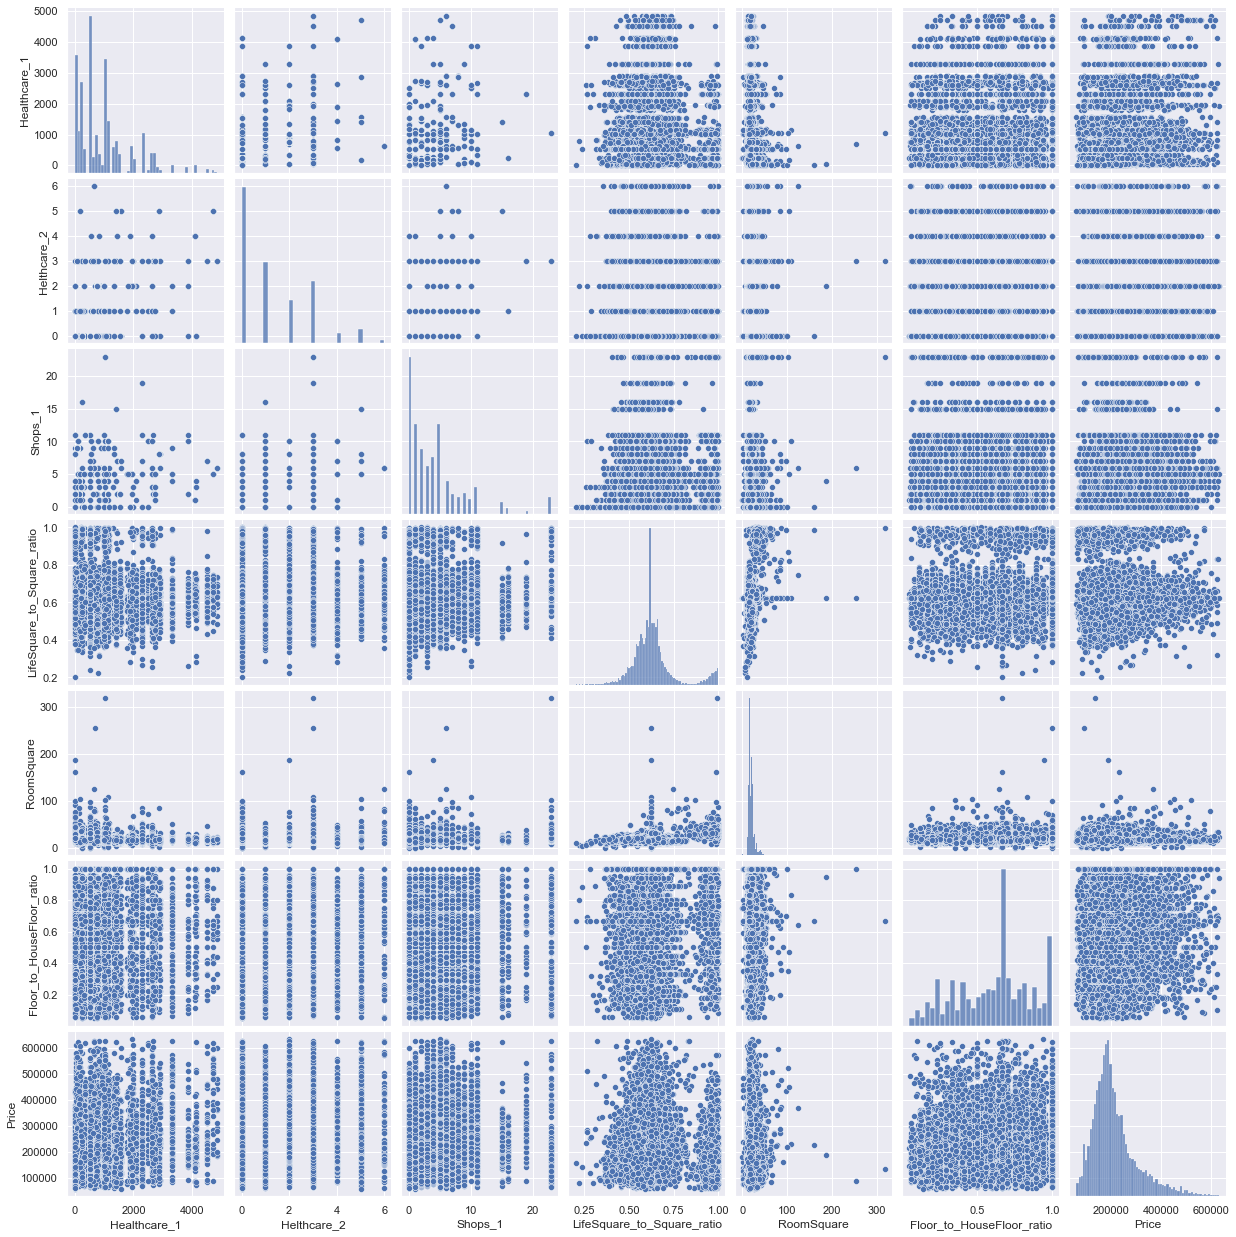

In [109]:
sns.set()
sns.pairplot(df_train[feature_num_names[12:] + ['Price']])

## Разбиение на тренировочную и тестовую выборки

In [110]:
df_train.isna().sum()

DistrictId                    0
Rooms                         0
Square                        0
LifeSquare                    0
KitchenSquare                 0
Floor                         0
HouseFloor                    0
HouseYear                     0
Ecology_1                     0
Ecology_2                     0
Ecology_3                     0
Social_1                      0
Social_2                      0
Social_3                      0
Healthcare_1                  0
Helthcare_2                   0
Shops_1                       0
Price                         0
Shops_2_A                     0
Shops_2_B                     0
LifeSquare_to_Square_ratio    0
RoomSquare                    0
Floor_to_HouseFloor_ratio     0
dtype: int64

In [111]:
X = df_train
y = df_train['Price']

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    shuffle=True, 
                                                    random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7500, 23) (7500,)
(2500, 23) (2500,)


In [113]:
Price_gr = X_train.groupby('Rooms')['Price'].median()
Price_gr

Rooms
1.000   155011.698
2.000   200768.237
3.000   269295.340
4.000   373187.260
5.000   445110.375
Name: Price, dtype: float64

In [114]:
X_train = X_train.merge(Price_gr, on='Rooms', how='left', suffixes=['', '_gr'])
X_test = X_test.merge(Price_gr, on='Rooms', how='left', suffixes=['', '_gr'])


X_train.drop(['Ecology_2', 'Ecology_3'], axis=1, inplace=True)
X_test.drop(['Ecology_2', 'Ecology_3'], axis=1, inplace=True)


X_train.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,...,Healthcare_1,Helthcare_2,Shops_1,Price,Shops_2_A,Shops_2_B,LifeSquare_to_Square_ratio,RoomSquare,Floor_to_HouseFloor_ratio,Price_gr
0,1,1.000,39.249,22.074,0.000,9,17.000,1977,0.007,1,...,240.000,0,1,114363.123,0,1,0.562,22.074,0.529,155011.698
1,61,2.000,56.054,33.930,8.000,8,12.000,1986,0.300,52,...,80.000,1,9,248648.730,0,1,0.605,16.965,0.667,200768.237
2,13,1.000,41.010,23.960,8.000,3,14.000,1997,0.091,74,...,1406.000,5,15,180347.854,0,1,0.584,23.960,0.214,155011.698
3,9,2.000,63.640,58.149,1.000,3,4.000,1977,0.162,25,...,30.000,2,4,183697.032,0,1,0.914,29.075,0.750,200768.237
4,90,1.000,49.328,20.992,12.000,15,23.000,2008,0.246,22,...,2715.000,3,3,245768.096,0,1,0.426,20.992,0.652,155011.698


In [115]:
df_test = df_test.merge(Price_gr, on='Rooms', how='left')

df_test.drop(['Ecology_2', 'Ecology_3'], axis=1, inplace=True)
df_test.rename(columns={'Price': 'Price_gr'}, inplace=True)

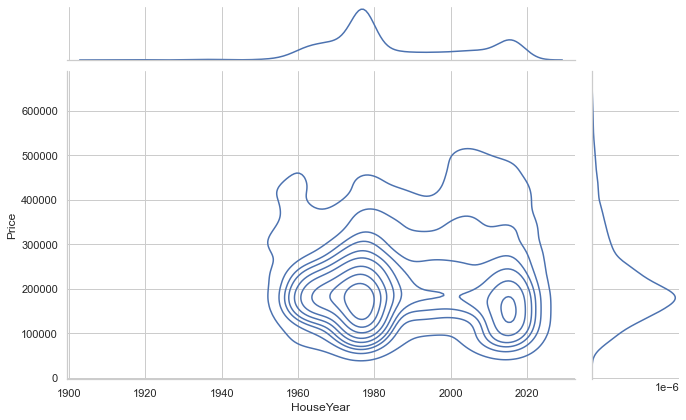

In [116]:
with sns.axes_style(style='whitegrid'):
    grid = sns.jointplot(X_train['HouseYear'], X_train['Price'], kind='kde')
grid.fig.set_figwidth(10)
grid.fig.set_figheight(6)

In [117]:
labels = ['1911 - 1974', '1974 - 1977', '1977 - 2001', '2001 - 2020']
X_train['Age_cat'] = pd.qcut(X_train['HouseYear'], q=4, labels=labels)
X_test['Age_cat'] = pd.qcut(X_test['HouseYear'], q=4, labels=labels)

X_train['Age_cat'].value_counts()

1974 - 1977    2241
1911 - 1974    1927
2001 - 2020    1856
1977 - 2001    1476
Name: Age_cat, dtype: int64

In [118]:
df_test['Age_cat'] = pd.qcut(df_test['HouseYear'], q=4, labels=labels)

In [119]:
X_train.groupby('Age_cat')['Price'].median()

Age_cat
1911 - 1974   196237.637
1974 - 1977   173714.224
1977 - 2001   225661.167
2001 - 2020   194270.128
Name: Price, dtype: float64

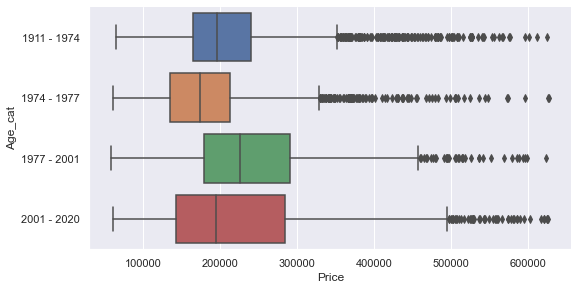

In [120]:
sns.catplot(x='Price', y='Age_cat',
            data=X_train, kind="box", size=4, aspect=4/2);

In [121]:
Price_gr_age = X_train.groupby('Age_cat')['Price'].median()
Price_gr_age

Age_cat
1911 - 1974   196237.637
1974 - 1977   173714.224
1977 - 2001   225661.167
2001 - 2020   194270.128
Name: Price, dtype: float64

In [122]:
X_train = X_train.merge(Price_gr_age, on='Age_cat', how='left', suffixes=['', '_gr_age'])
X_test = X_test.merge(Price_gr_age, on='Age_cat', how='left', suffixes=['', '_gr_age'])

X_train.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,...,Shops_1,Price,Shops_2_A,Shops_2_B,LifeSquare_to_Square_ratio,RoomSquare,Floor_to_HouseFloor_ratio,Price_gr,Age_cat,Price_gr_age
0,1,1.000,39.249,22.074,0.000,9,17.000,1977,0.007,1,...,1,114363.123,0,1,0.562,22.074,0.529,155011.698,1974 - 1977,173714.224
1,61,2.000,56.054,33.930,8.000,8,12.000,1986,0.300,52,...,9,248648.730,0,1,0.605,16.965,0.667,200768.237,1977 - 2001,225661.167
2,13,1.000,41.010,23.960,8.000,3,14.000,1997,0.091,74,...,15,180347.854,0,1,0.584,23.960,0.214,155011.698,1977 - 2001,225661.167
3,9,2.000,63.640,58.149,1.000,3,4.000,1977,0.162,25,...,4,183697.032,0,1,0.914,29.075,0.750,200768.237,1974 - 1977,173714.224
4,90,1.000,49.328,20.992,12.000,15,23.000,2008,0.246,22,...,3,245768.096,0,1,0.426,20.992,0.652,155011.698,2001 - 2020,194270.128


In [123]:
df_test = df_test.merge(Price_gr_age, on='Age_cat', how='left')

df_test.rename(columns={'Price': 'Price_gr_age'}, inplace=True)

In [124]:
X_train.drop('Age_cat', axis=1, inplace=True)
X_test.drop('Age_cat', axis=1, inplace=True)

In [125]:
df_test.drop('Age_cat', axis=1, inplace=True)

## RandomForest - первичные и дополнительные признаки, без логарифмов

In [126]:
feature_names = ['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor',
       'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2',
       'Social_3', 'Healthcare_1', 'Helthcare_2', 'Shops_1', 'Shops_2_A', 'Shops_2_B', 'LifeSquare_to_Square_ratio',
       'RoomSquare', 'Floor_to_HouseFloor_ratio', 'Price_gr', 'Price_gr_age']

In [127]:
rf_model = RandomForestRegressor(n_estimators=200, max_depth=17, max_features=10, random_state=42)
rf_model.fit(X_train[feature_names], y_train)

RandomForestRegressor(max_depth=17, max_features=10, n_estimators=200,
                      random_state=42)

Train:	R2 = 0.953	MAE = 12877
Test:	R2 = 0.727	MAE = 28792


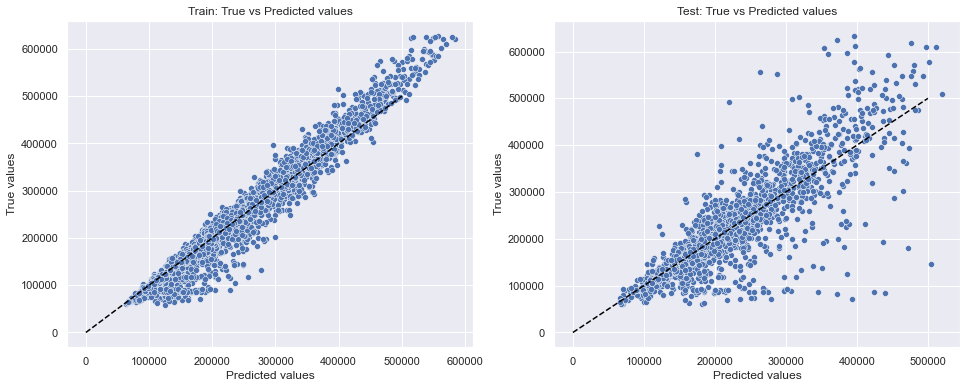

In [128]:
y_train_preds = rf_model.predict(X_train[feature_names])
y_test_preds = rf_model.predict(X_test[feature_names])

evaluate_preds(y_train, y_train_preds, y_test, y_test_preds)

In [129]:
feature_importances = pd.DataFrame(zip(X_train[feature_names].columns, rf_model.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False)

,feature_name,importance
2,Square,0.244
1,Rooms,0.086
20,Price_gr,0.085
10,Social_2,0.079
9,Social_1,0.073
11,Social_3,0.060
3,LifeSquare,0.056
0,DistrictId,0.044
8,Ecology_1,0.035
4,KitchenSquare,0.033


## Прогнозирование на тестовых данных

In [130]:
df_test_preds = rf_model.predict(df_test[feature_names])

In [138]:
df_test_preds = pd.DataFrame(df_test_preds, index=df_test.index, columns=['Price'])

In [134]:
df_test_preds.tail(10)

,Price
4990,196684.138
4991,210287.031
4992,314996.448
4993,203818.035
4994,178600.681
4995,243594.116
4996,126539.398
4997,328155.566
4998,199554.571
4999,177841.494


In [136]:
df_test_preds.to_csv(PREDICT_DATASET_PATH, index=True, index_label='Id', encoding='utf-8')